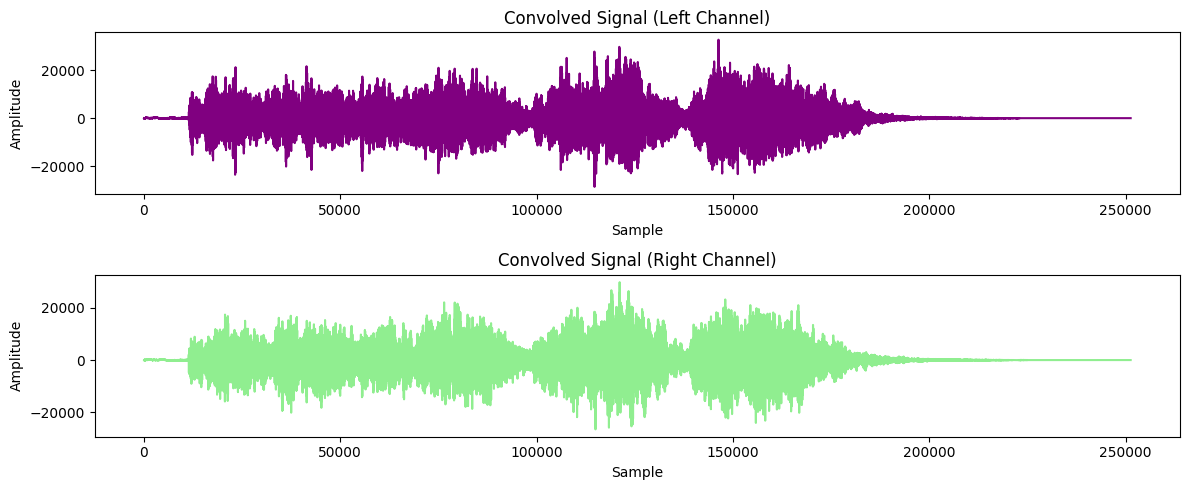

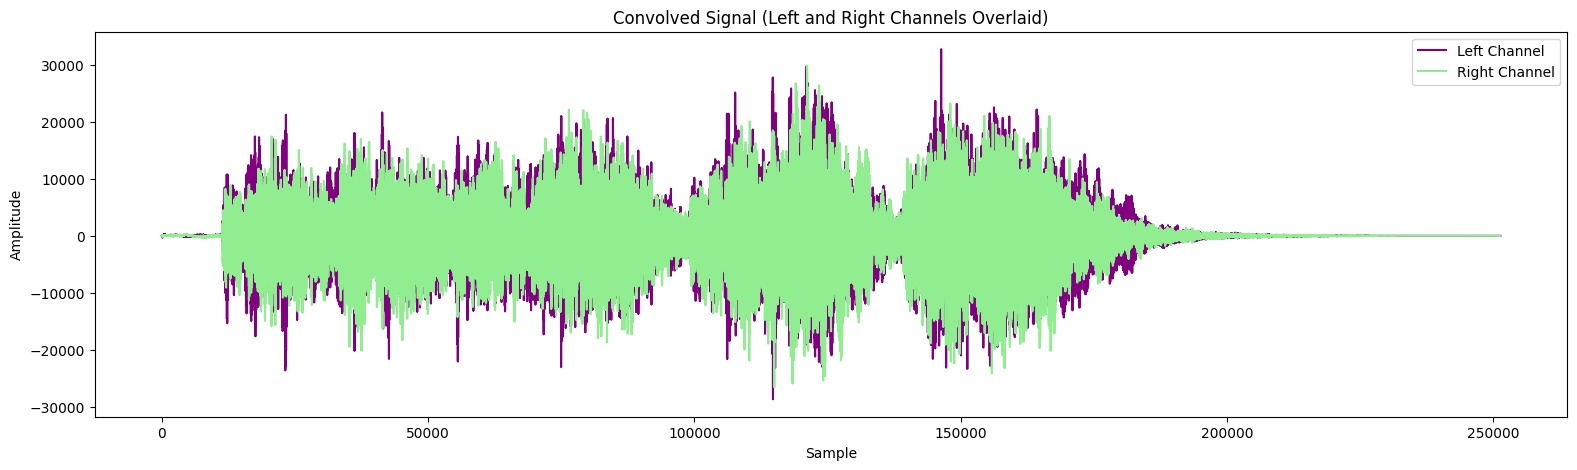

In [1]:

import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve

fs_inp, inp = wav.read("BheegiRegular.wav")

rate_rir, rir = wav.read("long_echo_hall_16k.wav")

rir_left = rir[:, 0]
rir_right = rir[:, 1]

out_left = fftconvolve(inp, rir_left, mode = 'full')
out_right = fftconvolve(inp, rir_right, mode = 'full')

out = np.vstack((out_left, out_right)).T

out = out / np.max(np.abs(out))
out=(out*32767).astype(np.int16) 

wav.write("long_echo_hall_convolve.wav", fs_inp, out)

plt.figure(figsize=(12, 5))

plt.subplot(2, 1, 1)
plt.title("Convolved Signal (Left Channel)")
plt.plot(out[:, 0], color='purple')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.title("Convolved Signal (Right Channel)")
plt.plot(out[:, 1], color='lightgreen')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

plt.figure(figsize=(19,5))
plt.title("Convolved Signal (Left and Right Channels Overlaid)")
plt.plot(out[:, 0], label='Left Channel', color='purple')
plt.plot(out[:, 1], label='Right Channel', color='lightgreen')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


